>#  HW7. 연령대별 성별비율을 산점도로 표현 - 3
학번: A70064, 이름: 안종민

목표: 사용자로부터 지역명을 입력받아 해당 지역의 0~100세 각 연령별 남성과 여성 인구수를 인구수 총합의 제곱근 크기로 조정된 점과 컬러맵을 적용한 산점도로 표현하고, 남=여 기준선을 함께 그린다.

데이터 출처: 행정안전부 주민등록인구통계 CSV (`population_by_gender.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- 라이브러리 임포트, 한글 폰트 설치 및 캐시 갱신, Colab 드라이브 마운트 등을 실행합니다.

In [9]:
from google.colab import drive
import csv
import os
import math
import matplotlib.pyplot as plt

# 한글 폰트 설치 & 캐시 갱신
# 시스템에 나눔글꼴 설치 (fonts-nanum)
!apt-get install fonts-nanum -qq
# 새로 설치된 폰트를 Matplotlib 등에서 인식하도록 캐시 갱신
!fc-cache -fv
import matplotlib.font_manager as fm

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 2. 데이터 로드

- `population_by_gender.csv` 파일을 열고 헤더를 건너뛴 뒤, 리스트로 변환합니다.
- 인코딩 확인: CSV 파일이 `CP949(euc-kr)` 인코딩일 경우 `encoding='cp949'` 지정

In [10]:
f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_by_gender.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 사용자 입력 및 데이터 추출

- 사용자 입력을 받고 해당 행을 찾아 target에 저장합니다.
- `for-else` 로 지역이 없을 때 예외 처리
- `target` 행에서 0~100세 남성 및 여성 인구수를 오름차순으로 리스트에 저장합니다.
- 쉼표 제거 `replace(',', '')` 후 `int()` 변환

In [11]:
# 사용자로부터 입력 받기
region = input("인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: ").strip()

# 해당 지역 행 찾기
for row in data:
    if region in row[0]:
        target = row
        break
else:
    raise ValueError(f"'{region}' 데이터를 찾을 수 없습니다.")

#연령대별 남·여 인구수 추출 (0세→100세 순)
#  - 남성: 인덱스 3~103
male = [int(x.replace(',', '')) for x in target[3:104]]
#  - 여성: 슬라이스 -1:-102:-1 후 reverse()
female_slice = target[-1:-102:-1]
female_slice.reverse()
female = [int(x.replace(',', '')) for x in female_slice]

인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: 제주


### 4. 시각화 설정 및 Scatter 그래프 출력

- `ages`가 산점도의 컬러맵 값으로도 사용됩니다.
- `c=ages`와 `cmap='jet'`로 0세(파랑)→100세(빨강) 색상 표현
- `plt.plot`으로 대각선 기준선 추가
- 산점도 + 컬러맵 + 기준선이 그려진 그래프를 출력합니다.
- 각 연령대의 남+여 인구수를 합산한 뒤, 제곱근을 취해 점의 크기로 활용
- `s=[v*3 for v in size]` 로 점 크기를 3배 확대
- `figsize=(6,4)`에서 `figsize=(18,12)`로 화면 크기를 3배로 설정
- 선명도를 위해 DPI 3배 적용

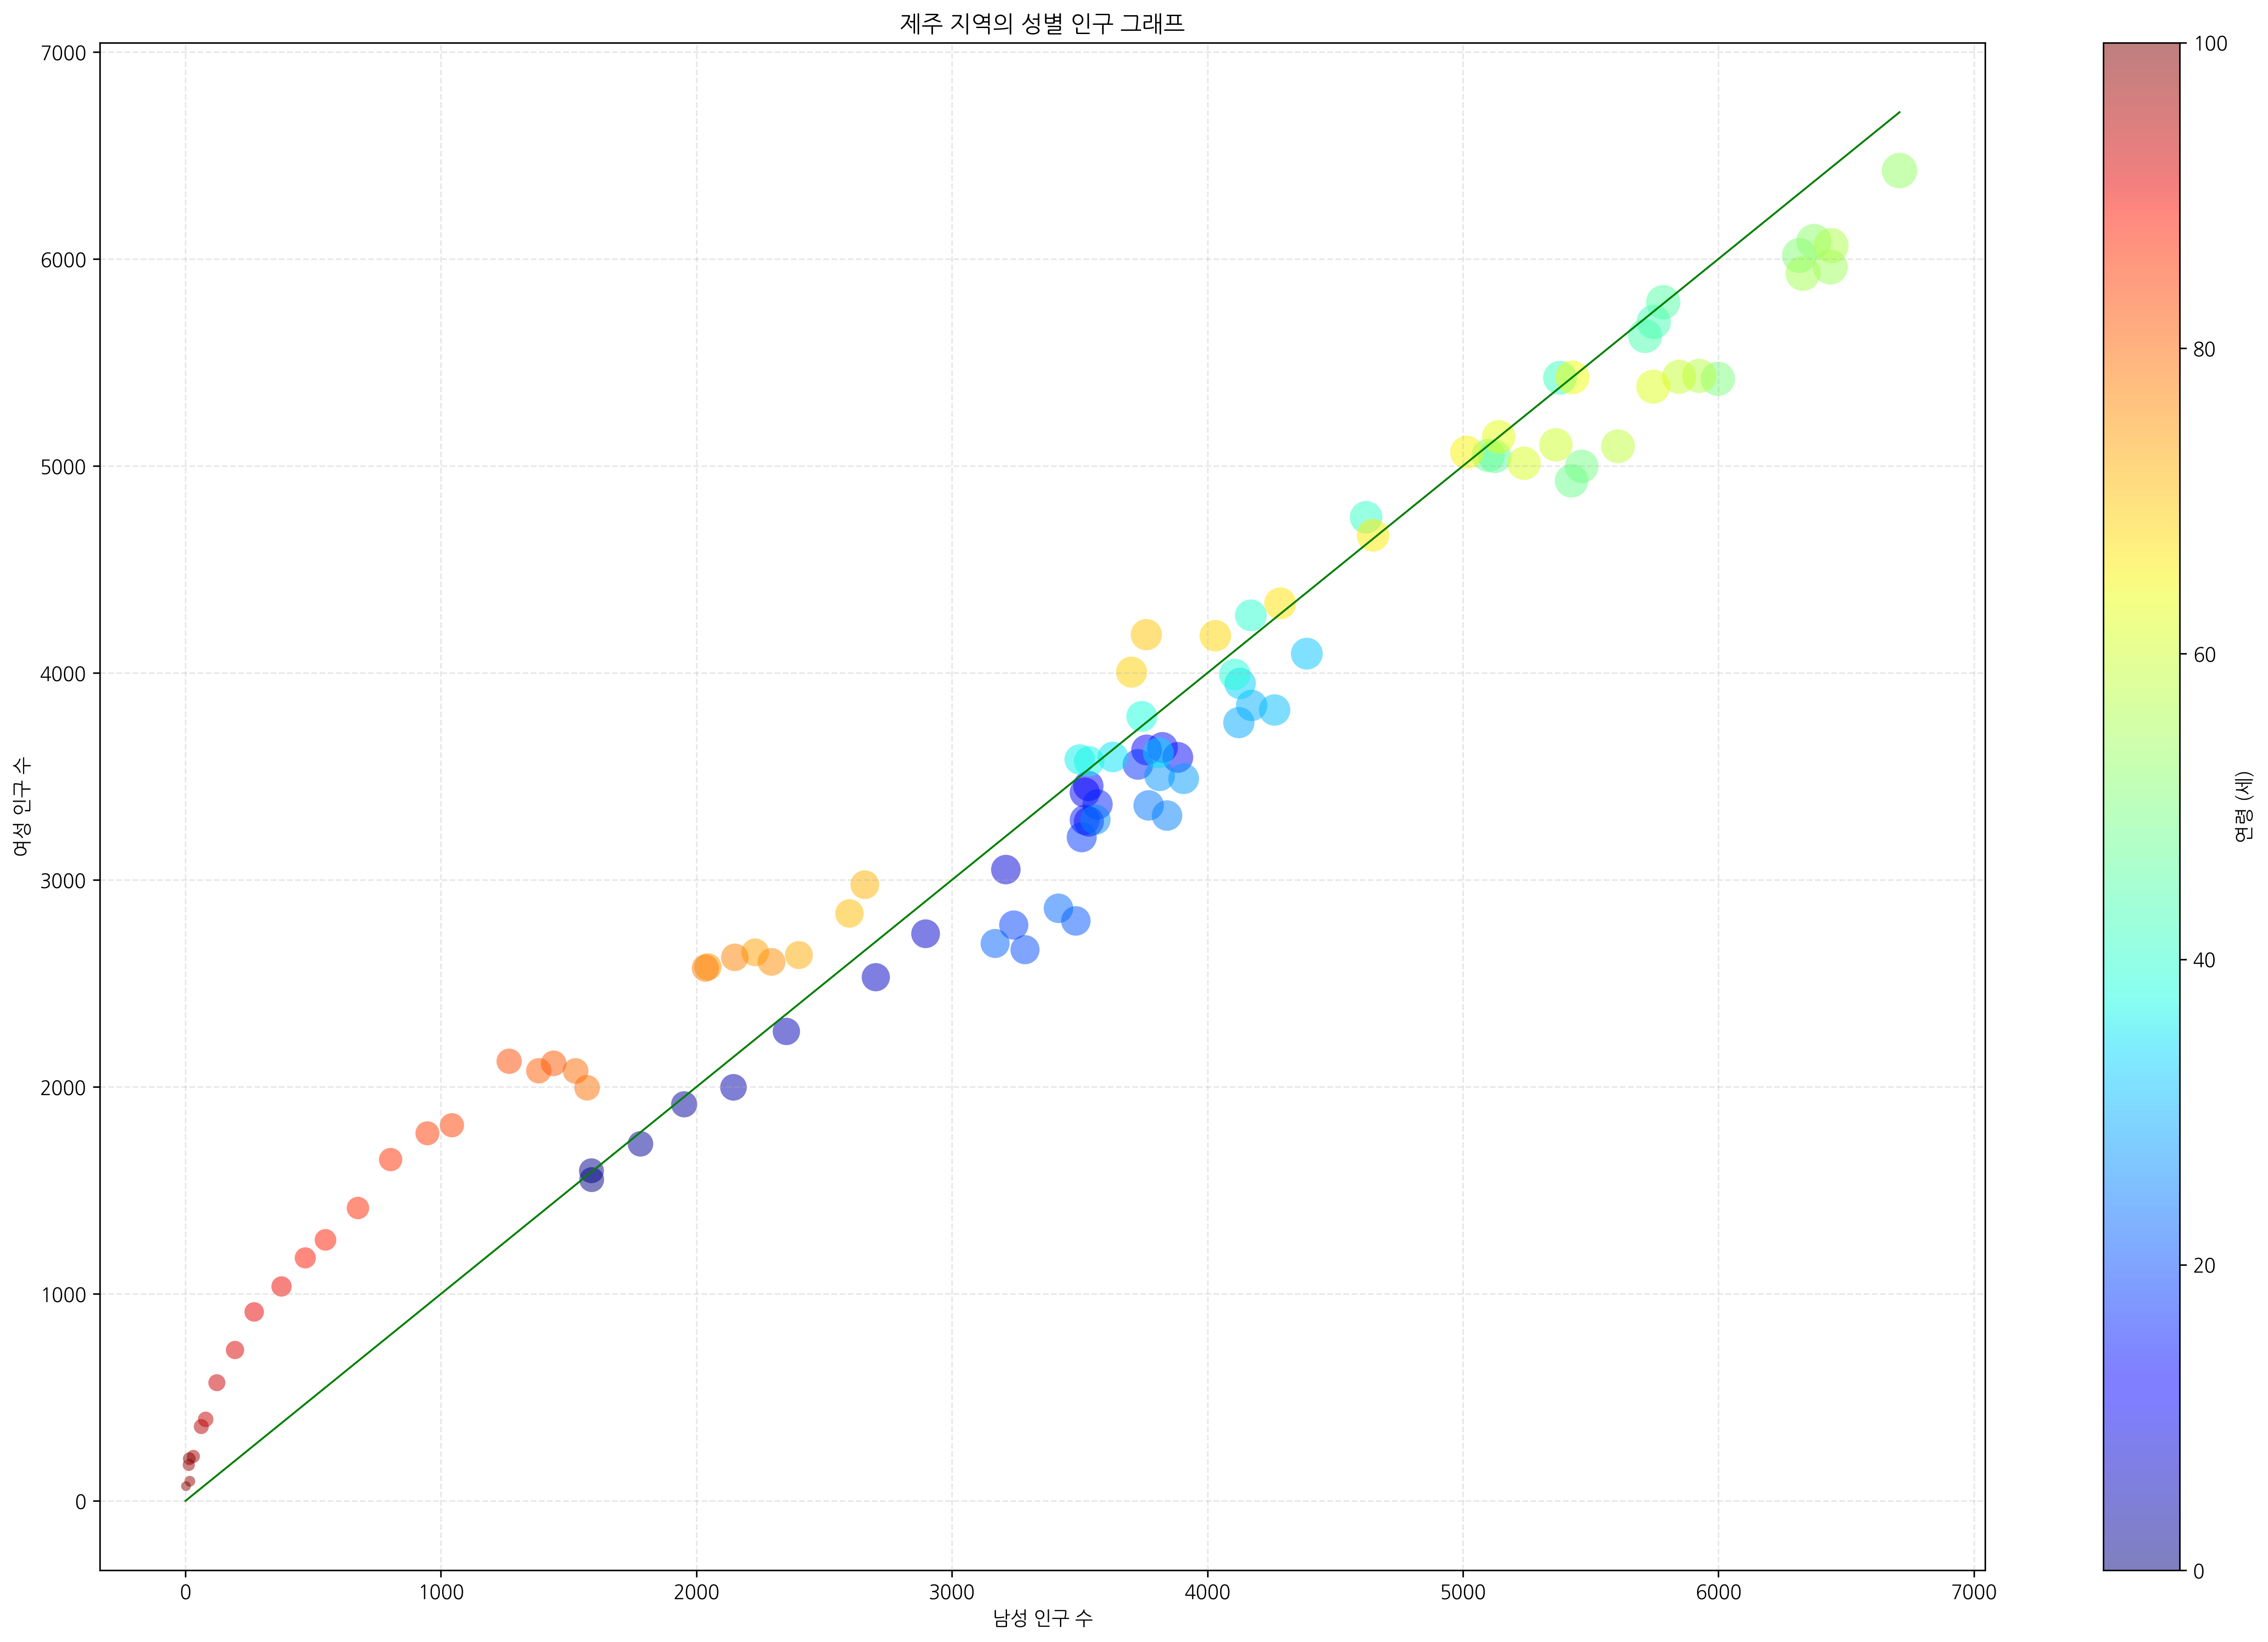

In [12]:
# 시각화 섫정 및 그래프 출력

ages = list(range(101))
# 점 크기 계산: (남+여) 인구의 제곱근
size = []
for m, f in zip(male, female):
    total = m + f
    size.append(math.sqrt(total))

# 그래프 크기를 기존의 3배로 설정 (기본 6, 4 → 18, 12), dpi 3배 (default: 100)
plt.figure(figsize=(18, 12), dpi=300)

# 산점도: 색상=나이, 점 크기=size, 투명도 0.5, 컬러맵 'jet'
sc = plt.scatter(
    male,
    female,
    s=[v*3 for v in size],  # 점 크기를 3배 확대
    c=ages,
    alpha=0.5,
    cmap='jet',
    edgecolors='none'
)

# 대각선 기준선(남=여)
max_val = max(max(male), max(female))
plt.plot([0, max_val], [0, max_val], 'g', linewidth=1)

# 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트를 Matplotlib 전역에 추가
fm.fontManager.addfont(font_path)
# 폰트 내부 이름 확인 (optional)
font_prop = fm.FontProperties(fname=font_path)
# rcParams 에서 이 이름을 기본 폰트로 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.title(f"{region} 지역의 성별 인구 그래프")
plt.xlabel("남성 인구 수")
plt.ylabel("여성 인구 수")
cb = plt.colorbar(sc, label='연령 (세)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()